In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import re
import seaborn as sns

In [2]:
dfs = []
data_folder = './data/'
# Iterate over each file in the folder
for filename in os.listdir(data_folder):
    if filename.endswith('.csv'):  # Check if the file is a CSV file
        # Read the CSV file into a dataframe and append it to the list
        df = pd.read_csv(os.path.join(data_folder, filename))
        dfs.append(df)

# Concatenate dataframes into one dataframe
concatenated_df = pd.concat(dfs, ignore_index=True)

# Save concatenated dataframe to CSV
#concatenated_df.to_csv('./data/combined_data.csv', index=False)

In [3]:
combined_df = pd.read_csv('data/combined_data.csv')
combined_df['Country'] = combined_df['Country'].str.lower()
combined_df['Country'] = combined_df['Country'].str.replace('-',' ')
combined_df['Price'] = combined_df['Price'].str.replace(r'(\d+)\s\d+', r'\1')
combined_df['Price'] = combined_df['Price'].str.replace(' ', '')
combined_df['Price'] = combined_df['Price'].str.replace(',', '')


combined_df

,Listing ID,Bedrooms,Bathrooms,Lot Size,House Size,Property Type,Price,Country,Source
0,l_148707254,1 Bed,1 Bath,NaN,"('3,605 Sqft', ' sqft')",Residential,139999,nicaragua,point2homes
1,l_149525836,NaN,NaN,"4,401 ac Lot Size",NaN,Residential,19194600,nicaragua,point2homes
2,l_161042355,2 Beds,2 Baths,0.188 ac Lot Size,NaN,Residential,175000,nicaragua,point2homes
3,l_161126291,2 Beds,2 Baths,0.029 ac Lot Size,NaN,Other,265000,nicaragua,point2homes
4,l_158346873,3 Beds,2 Baths,NaN,"('4,305 Sqft', ' sqft')",Residential,649000,nicaragua,point2homes
...,...,...,...,...,...,...,...,...,...
29109,94391347,14,14,NaN,10763.9 ft sqr,Furnished house,15012010,brazil,properstar.com
29110,94391251,10,8,NaN,12916.68 ft sqr,Furnished house,2201761,brazil,properstar.com
29111,94387041,17,17,NaN,8611.119999999999 ft sqr,Hotel,1401121,brazil,properstar.com
29112,94386248,10,7,NaN,7534.73 ft sqr,House with flats,817687,brazil,properstar.com


In [4]:
def remove_chars(list):
    new_list = []
    for i in list:
        try:
            i = float(i)
            new_list.append(float(i))
            #print(i)
        except ValueError:
            print(f'not a number: {i}')
            i = None
            new_list.append(i)
            
    print(len(new_list))
    return (new_list)

In [5]:
combined_df.loc[:,'Price'] = remove_chars(combined_df['Price'])
combined_df['Bedrooms'] = combined_df['Bedrooms'].str.replace(r'\D', '', regex=True)
combined_df = combined_df.dropna(subset=['Price'])
combined_df.to_csv("combined_cleaned.csv")

not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: 91.077.600VES
not a number: 3.319.138VES
not a number: 1.918.232VES
not a number: 1.257.997VES
not a number: 1.466.593VES
not a number: 3.214.504VES
not a number: 2.764.473VES
not a number: 8.822.398VES
not a number: 9.034.251VES
not a number: 71.989.000VES
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand
not a number: Priceondemand


In [6]:
combined_df

,Listing ID,Bedrooms,Bathrooms,Lot Size,House Size,Property Type,Price,Country,Source
0,l_148707254,1,1 Bath,NaN,"('3,605 Sqft', ' sqft')",Residential,139999.0,nicaragua,point2homes
1,l_149525836,NaN,NaN,"4,401 ac Lot Size",NaN,Residential,19194600.0,nicaragua,point2homes
2,l_161042355,2,2 Baths,0.188 ac Lot Size,NaN,Residential,175000.0,nicaragua,point2homes
3,l_161126291,2,2 Baths,0.029 ac Lot Size,NaN,Other,265000.0,nicaragua,point2homes
4,l_158346873,3,2 Baths,NaN,"('4,305 Sqft', ' sqft')",Residential,649000.0,nicaragua,point2homes
...,...,...,...,...,...,...,...,...,...
29109,94391347,14,14,NaN,10763.9 ft sqr,Furnished house,15012010.0,brazil,properstar.com
29110,94391251,10,8,NaN,12916.68 ft sqr,Furnished house,2201761.0,brazil,properstar.com
29111,94387041,17,17,NaN,8611.119999999999 ft sqr,Hotel,1401121.0,brazil,properstar.com
29112,94386248,10,7,NaN,7534.73 ft sqr,House with flats,817687.0,brazil,properstar.com


In [7]:
all_house_tyeps = combined_df['Property Type'].unique()
print(all_house_tyeps)
house_styles = ['Semi-Detached','Private mansion','House in village','Detached Two+ Storey','Terraced house','Twin house','Coeval villa','Semi-detached house','Adjacent house','Townhouse', 'Furnished house','Residential', 'House', 'New house', 'Mansion house', 'Villa', 'Private mansion', 'Detached house', 'Semi-detached house', 'Furnished House', 'Farmhouse', 'Chalet']
apartment_styles = ['Apartment', 'Terraced apartment','House with flats','Studio apartment','Ground-floor apartment with garden','Apartment in contemporary house','Loft', 'New apartment','Furnished apartment', 'Penthouse', 'Condominium', 'Unit']

['Residential' 'Other' 'Lots And Land' 'Lots and Land' 'House' 'Apartment'
 'Land' 'Industrial/Warehouse' 'Commercial' 'Detached house' nan
 'Building land' 'Farmhouse' 'Plot of land' 'Property' 'Hotel' 'Villa'
 'Building' 'Commercial premises' 'Farm' 'Commercial building'
 'New apartment' 'New house' 'Furnished apartment' 'Penthouse'
 'Terraced apartment' 'Plot' 'Furnished house' 'Townhouse' 'Office'
 'Commercial ground' 'Shop' 'Restaurant' 'House with flats'
 'Adjacent house' 'Industrial / commercial plot' 'Semi-detached house'
 'Coeval villa' 'Investment property' 'Twin house' 'Domain'
 'Studio apartment' 'Ground-floor apartment with garden'
 'Subsidized building' 'Loft' 'Furnished duplex' 'Room' 'Terraced house'
 'Detached Two+ Storey' 'Condominium' 'Multifamily' 'Retail' 'Offices'
 'Duplex' 'Multi-purpose' 'Two+ Storey' 'Recreational' 'Farm and Ranch'
 'Farm And Agriculture' 'MultiFamily' 'Commercial Farming'
 'Land/Development' 'Rural' 'Hotel/Leisure' 'Chalet'
 'Apartment in cont

In [8]:
countries = combined_df['Country'].unique()
countries

array(['nicaragua', 'dominican republic', 'honduras', 'costa rica',
       'puerto rico', 'venezuela', 'guatemala', 'colombia', 'mexico',
       'brazil'], dtype=object)

In [9]:
brazil_df = combined_df[combined_df['Country'] == 'brazil']
nicaragua_df = combined_df[combined_df['Country'] == 'nicaragua']
dr_df = combined_df[combined_df['Country'] == 'dominican republic']
honduras_df = combined_df[combined_df['Country'] == 'honduras']
cr_df = combined_df[combined_df['Country'] == 'costa rica']
pr_df = combined_df[combined_df['Country'] == 'puerto rico']
venezuela_df = combined_df[combined_df['Country'] == 'venezuela']
guatemala_df = combined_df[combined_df['Country'] == 'guatemala']
colombia_df = combined_df[combined_df['Country'] == 'colombia']
mexico_df = combined_df[combined_df['Country'] == 'mexico']

In [10]:
df_dict = {'brazil': brazil_df,
           'nicaragua': nicaragua_df,
           'dominican republic': dr_df,
           'honduras': honduras_df,
           'costa rica': cr_df,
           'puerto rico':pr_df,
           'venezuela': venezuela_df,
           'guatemala': guatemala_df,
           'colombia': colombia_df,
           'mexico': mexico_df}


In [11]:
def filtered_apartment_data(country, filtered_apartment_data):
    plt.figure(figsize=(8,8))
    plt.boxplot(filtered_apartment_data['Price'], vert = False)
    plt.title(f'Filtered apartment prices in {country}')
    plt.xlabel('Price in USD')
    plt.show()

    plt.figure(figsize=(10,6))
    sns.histplot(filtered_apartment_data['Price'].astype(float), bins=20, kde=True)
    plt.title(f'Histogram of filtered {country} apartment Prices')
    plt.xlabel('Price in USD')
    plt.ylabel('Frequency')
    plt.show()
    
    print(f'{country} filtered apartment mean: {filtered_apartment_data['Price'].mean()}')
    print(f'{country} filtered apartment median: {filtered_apartment_data['Price'].median()}')
    

In [12]:
def filtered_house_data(country, filtered_house_df):
    
    plt.figure(figsize=(8,8))
    plt.boxplot(filtered_house_df['Price'], vert = False)
    plt.title(f'Filtered house prices in {country}')
    plt.xlabel('Price in USD')
    plt.show()

    plt.figure(figsize=(10,6))
    sns.histplot(filtered_house_df['Price'].astype(float), bins=20, kde=True)
    plt.title(f'Histogram of filtered {country} house Prices')
    plt.xlabel('Price in USD')
    plt.ylabel('Frequency')
    plt.show()
    
    print(f'{country} filtered house mean: {filtered_house_df['Price'].mean()}')
    print(f'{country} filtered house median: {filtered_house_df['Price'].median()}')

In [13]:
def filter_data(country, new_df, house_bool):
    q1 = new_df['Price'].quantile(0.25)
    q3 = new_df['Price'].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter the data to remove outliers
    filtered_data = new_df[(new_df['Price'] >= lower_bound) & (new_df['Price'] <= upper_bound)]

    if house_bool == True:
        filtered_house_data(country, filtered_data)
    else:
        filtered_apartment_data(country, filtered_data)


In [14]:
def get_house_prices(country):
    df = df_dict[country]
    houses_df = df[df['Property Type'].isin(house_styles)]
    apartment_df = df[df['Property Type'].isin(apartment_styles)]

    house_bool = True
    
    # plt.figure(figsize=(8,8))
    # plt.boxplot(houses_df['Price'], vert = False)
    # plt.title(f'House prices in {country}')
    # plt.xlabel('Price in USD')
    # plt.show()

    # plt.figure(figsize=(10,6))
    # sns.histplot(houses_df['Price'].astype(float), bins=20, kde=True)
    # plt.title(f'Histogram of {country} house Prices')
    # plt.xlabel('Price in USD')
    # plt.ylabel('Frequency')
    # plt.show()

    plt.figure(figsize=(8,8))
    plt.boxplot(apartment_df['Price'], vert = False)
    plt.title(f'Apartment prices in {country}')
    plt.xlabel('Price in USD')
    plt.show()

    plt.figure(figsize=(10,6))
    sns.histplot(apartment_df['Price'].astype(float), bins=20, kde=True)
    plt.title(f'Histogram of {country} apartment Prices')
    plt.xlabel('Price in USD')
    plt.ylabel('Frequency')
    plt.show()
    
    print(f'{country} house mean: {houses_df['Price'].mean()}')
    print(f'{country} house median: {houses_df['Price'].median()}')
    print(f'{country} apartment mean: {apartment_df['Price'].mean()}')
    print(f'{country} apartment median: {apartment_df['Price'].median()}')

    filter_data(country, houses_df, house_bool)
    house_bool = False
    filter_data(country, apartment_df, house_bool)

In [15]:
def make_plot(country):
    df = df_dict[country]
    # plt.figure(figsize=(8,8))
    # plt.boxplot(df['Price'], vert = False)
    # plt.title(f'Property prices in {country}')
    # plt.xlabel('Price in USD')
    # plt.show()

    # plt.figure(figsize=(10,6))
    # sns.histplot(df['Price'].astype(float), bins=20, kde=True)
    # plt.title(f'Histogram of {country} Property Prices')
    # plt.xlabel('Price in USD')
    # plt.ylabel('Frequency')
    # plt.show()
    
    print(f'{country} mean: {df['Price'].mean()}')
    print(f'{country} median: {df['Price'].median()}')
    
    get_house_prices(country)

brazil mean: 421412.5338106549
brazil median: 170126.0


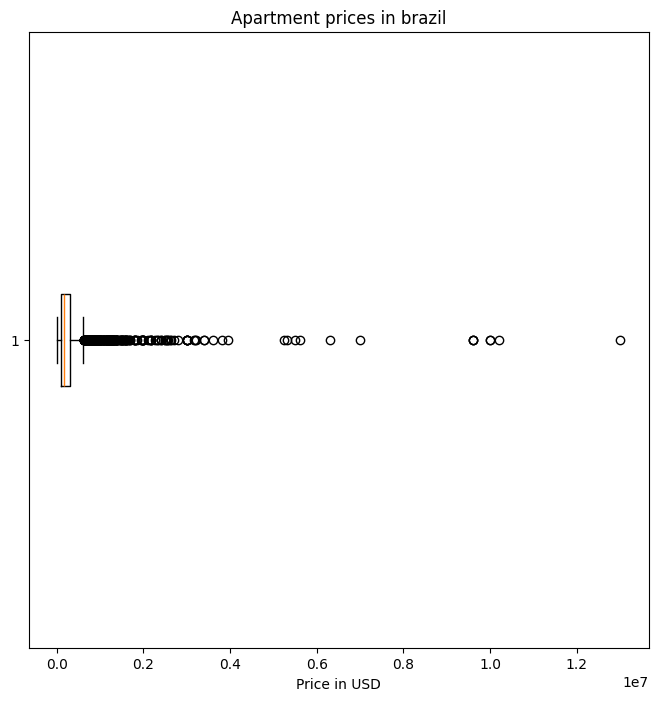

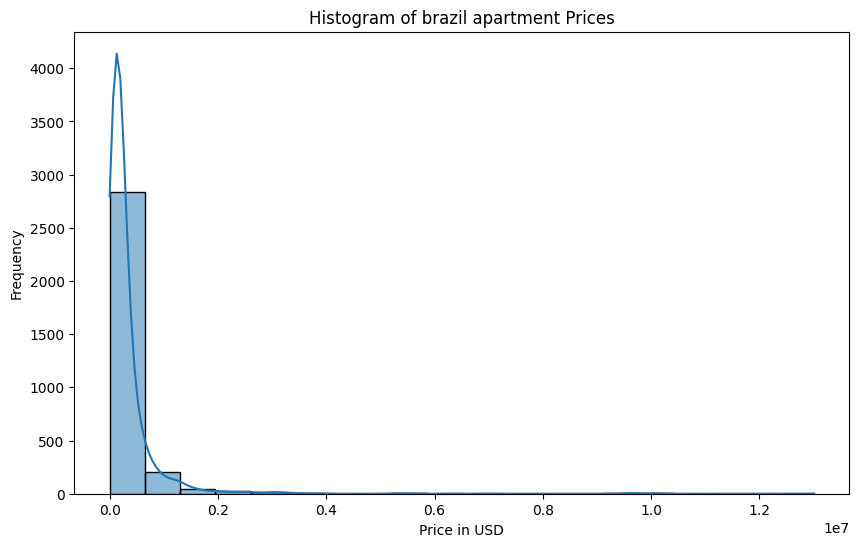

brazil house mean: 723810.9029245693
brazil house median: 260193.0
brazil apartment mean: 318742.55707908166
brazil apartment median: 160118.0


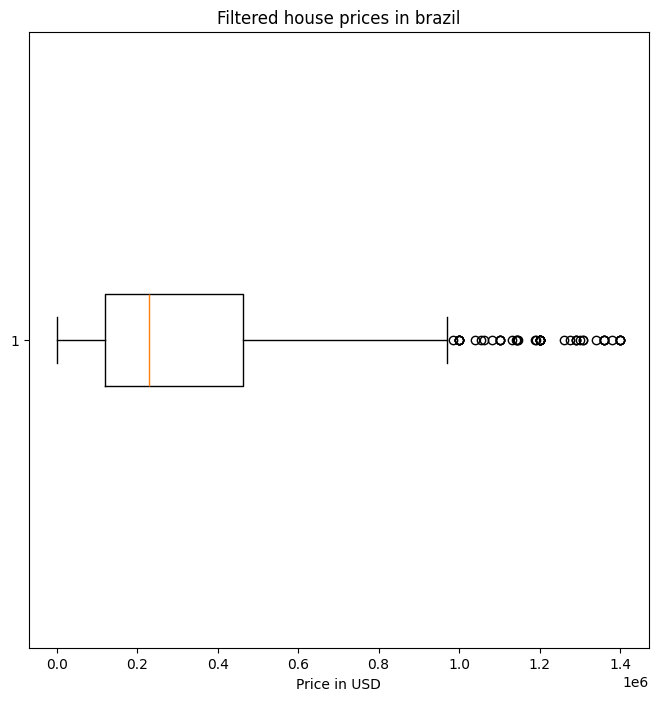

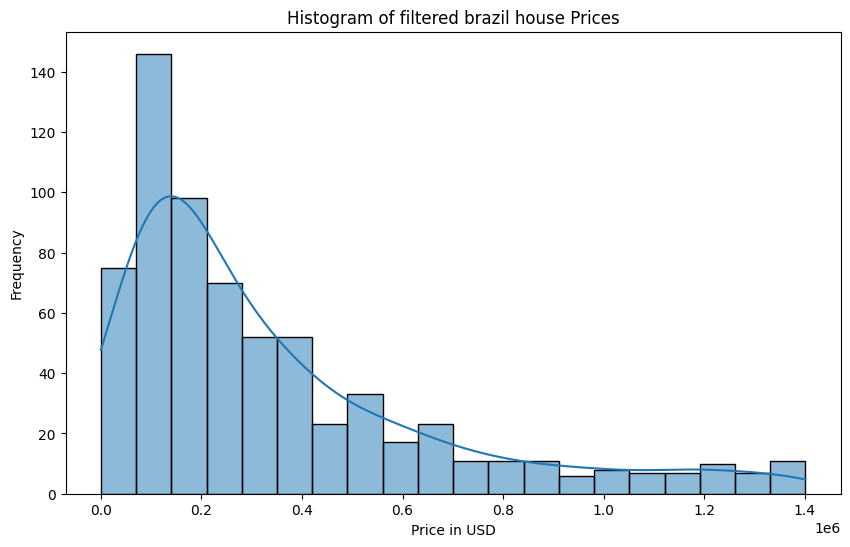

brazil filtered house mean: 347934.55339432595
brazil filtered house median: 229168.5


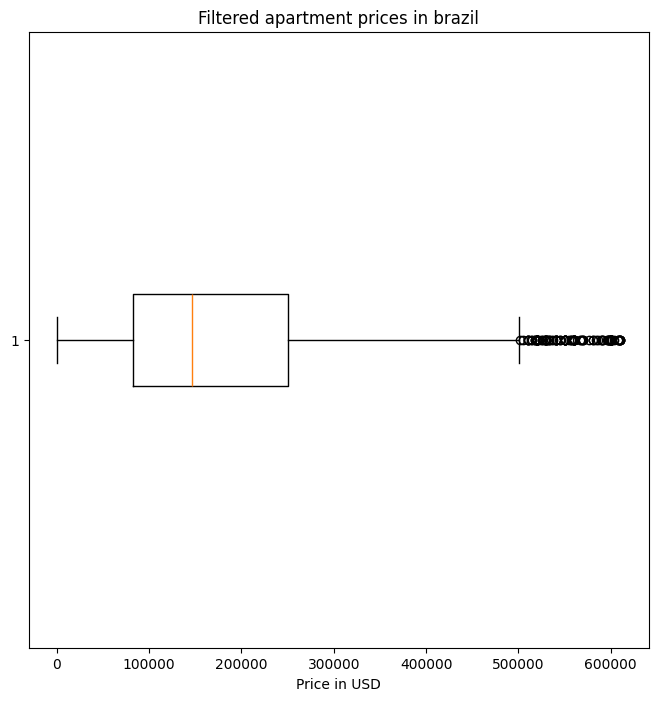

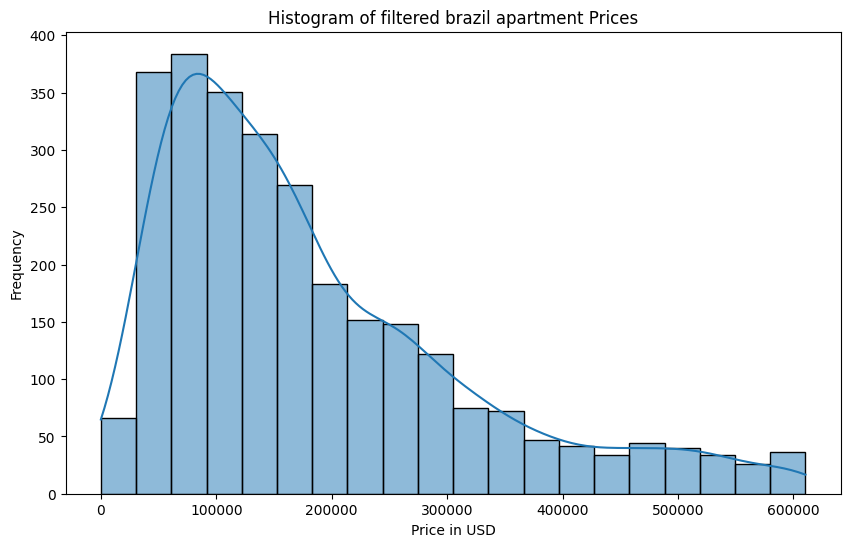

brazil filtered apartment mean: 182846.09191307446
brazil filtered apartment median: 146507.0
nicaragua mean: 557810.0578828829
nicaragua median: 199000.0


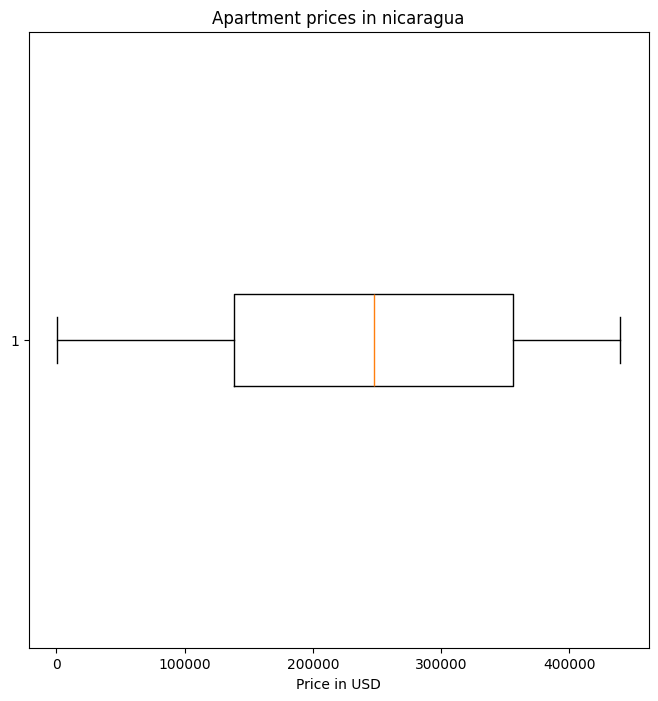

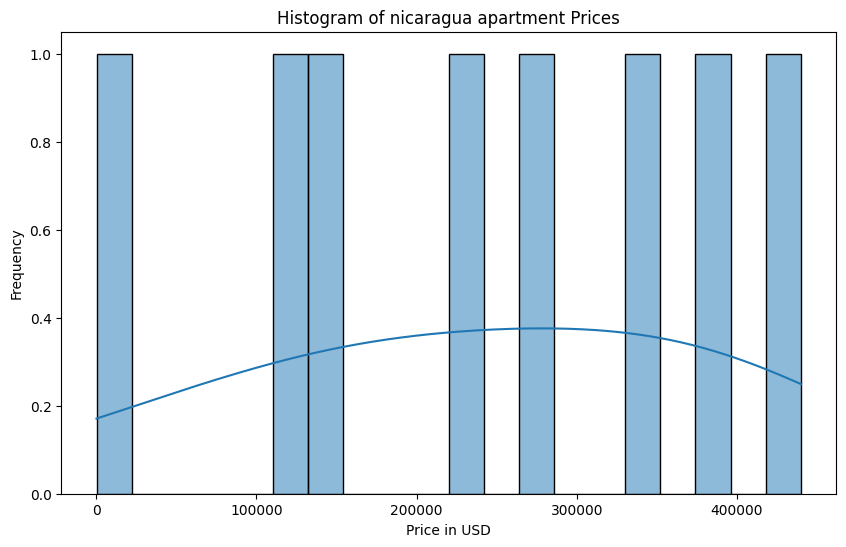

nicaragua house mean: 486015.0275080906
nicaragua house median: 237000.0
nicaragua apartment mean: 240531.25
nicaragua apartment median: 247500.0


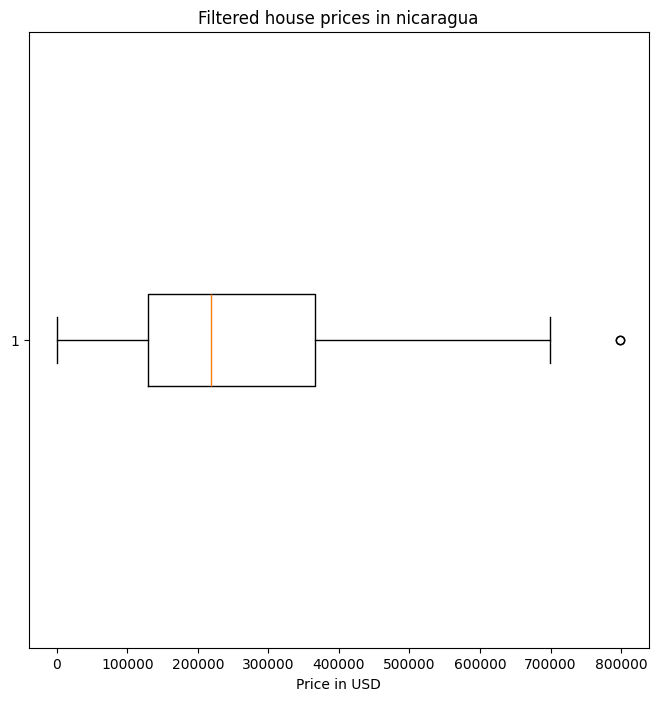

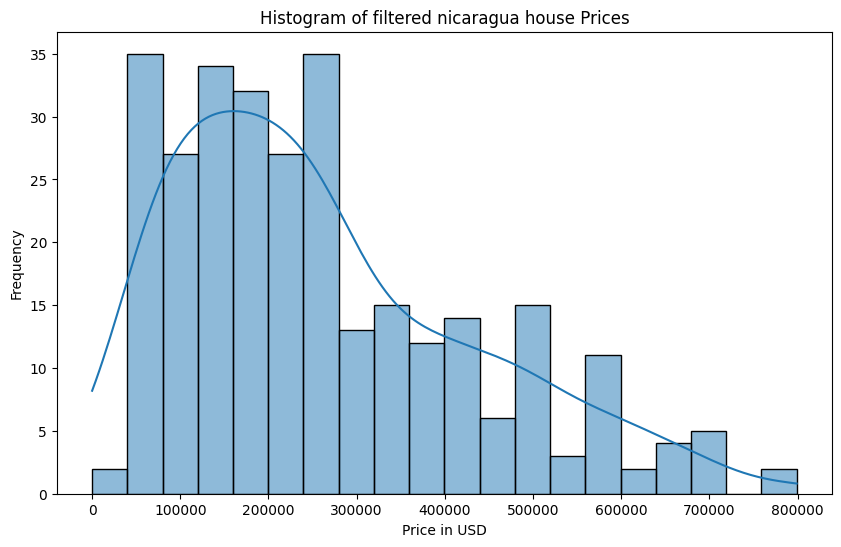

nicaragua filtered house mean: 260734.61904761905
nicaragua filtered house median: 218500.0


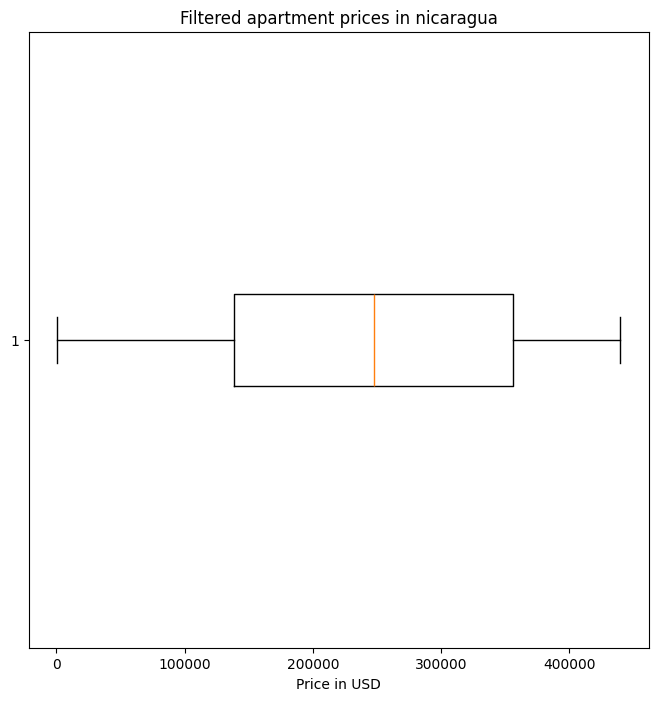

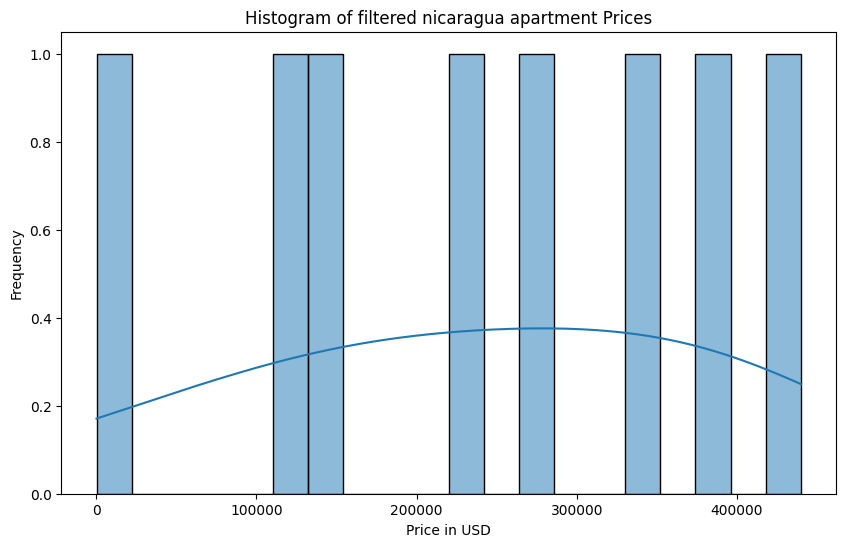

nicaragua filtered apartment mean: 240531.25
nicaragua filtered apartment median: 247500.0
dominican republic mean: 1869772.082807521
dominican republic median: 219950.0


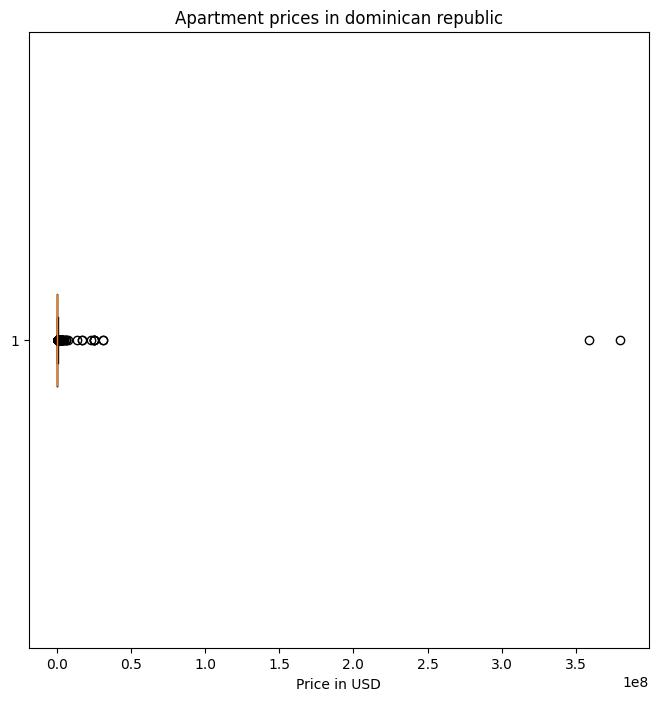

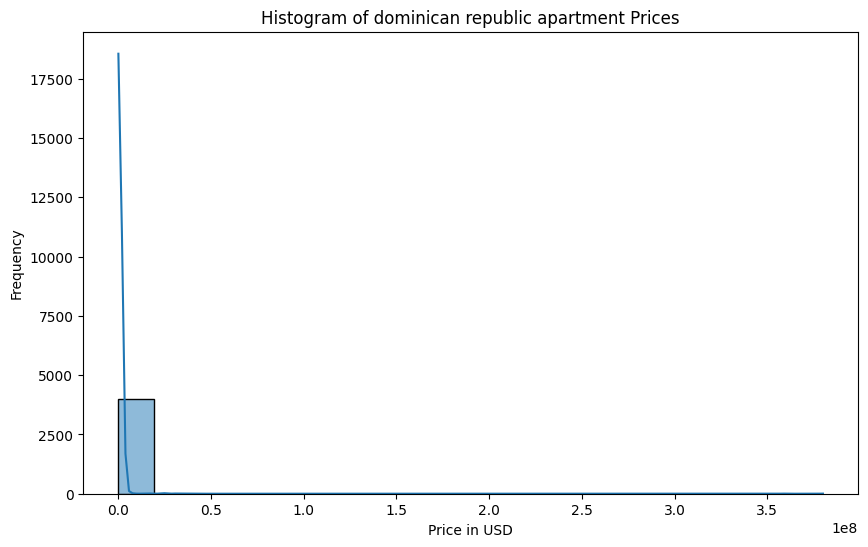

dominican republic house mean: 4833216.490852625
dominican republic house median: 327141.0
dominican republic apartment mean: 514998.4146853147
dominican republic apartment median: 188250.0


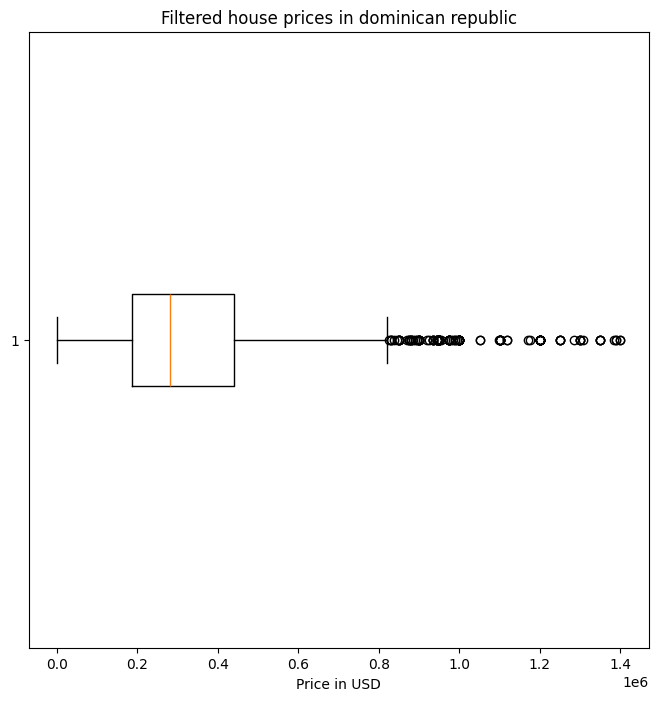

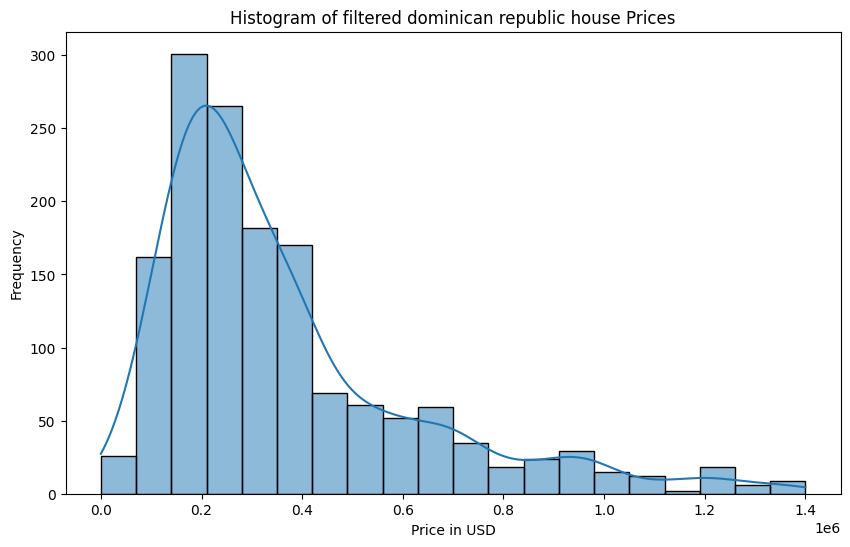

dominican republic filtered house mean: 364223.75841584156
dominican republic filtered house median: 280250.0


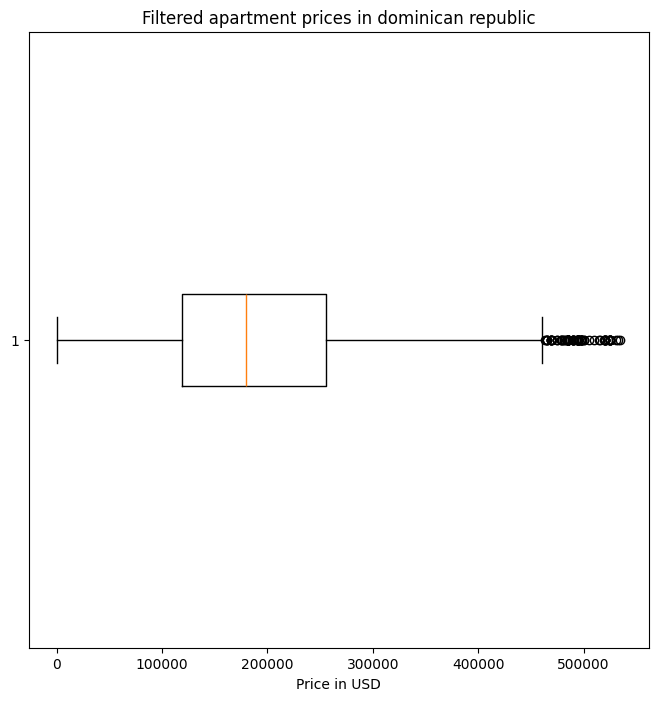

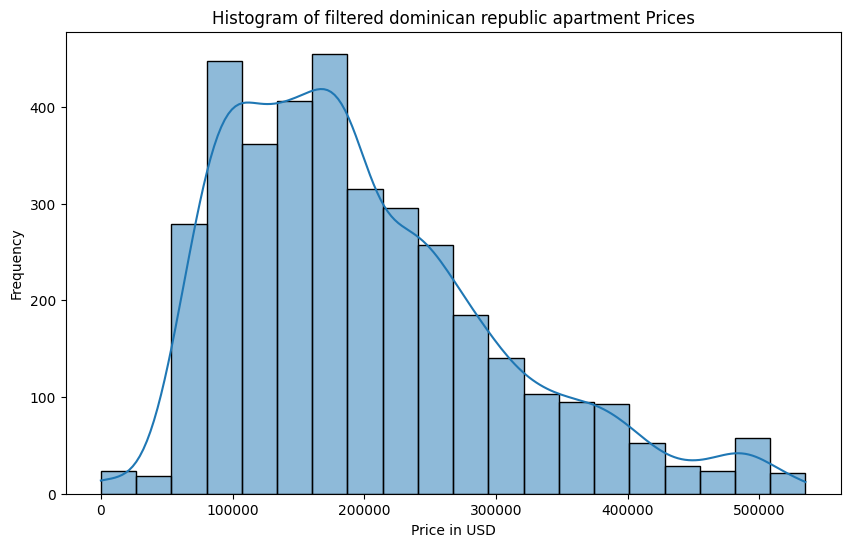

dominican republic filtered apartment mean: 198366.54935739678
dominican republic filtered apartment median: 179548.0
honduras mean: 2145155.1960784313
honduras median: 265000.0


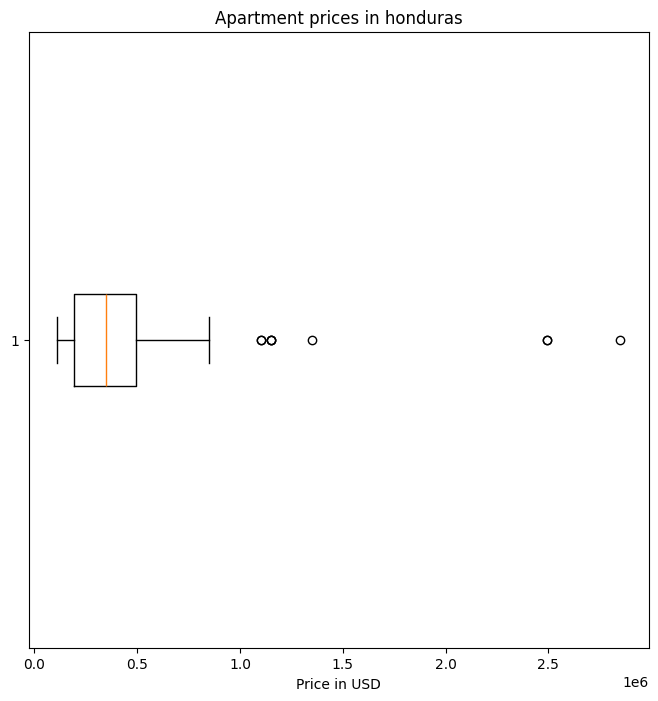

In [16]:
for i in df_dict:
    make_plot(i)